### Data Visualization in Python

In [67]:
# Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

In [104]:
# import data
df = pd.read_csv('telco_customer_churn.csv')
df2 = pd.read_csv('apartment_data.csv')

df3 = sns.load_dataset("penguins")
df3 = df3.dropna().reset_index(drop = True)

#### Permasalahan
1. Data: Telco Customer Churn (df)

    a. Gambarlah histogram dari kolom 'Tenure', dan pisahkan dengan warna berdasarkan Churn. Namun, pada visualisasi tersebut, tambahkan pula 'Density Plot' di atas Histogram sehingga hasil akhir visualisasinya menjadi seperti yang terlihat pada Slide. 

    b. Buatlah Stacked Bar Chart yang memperlihatkan rasio dari kolom 'InternetService' terhadap customer-customer yang Churn dan Non Churn. 
    
    c. Jawablah pertanyaan ini: bagi customer yang Churn, kebanyakan dari mereka memiliki InternetService tipe apa? 

2. Data: Apartment Data (df2)

    a. Buatlah sebuah bar plot di mana sumbu-x adalah kolom `Bathroom`, dan sumbu-y adalah kolom `AnnualPrice` (yang dirata-ratakan menurut kolom `Bathroom`). Jadi, kita ingin melihat, berapa `AnnualPrice` rata-rata untuk apartement yang memiliki 0, 1, 2, 3 `Bathroom`. 
    
    b. Jawablah pertanyaan ini: apartment dengan berapa kamar mandi yang memiliki rata-rata Annual Price paling tinggi?

3. Data: Penguins (df3)

    a. Buatlah visualisasi scatterplot menggunakan Sub Plots (materi Day 8). Terdapat 2 Sub Plots yang akan dibuat, dengan ketentuan berikut:
    - Terdapat 2 scatterplot. Posisi subplots adalah 1 kolom dan 2 baris. Artinya, kedua scatterplot yang akan kita gambar akan saling tumpuk-menumpuk (ada yang di atas, ada yang di bawah). 
    - Scatterplot pertama: sumbu-x: `body_mass_g`, sumbu-y: `flipper_length_mm`
    - Scatterplot kedua: sumbu-x: `body_mass_g`, sumbu-y: `bill_length_mm`
    - Scatterplot diberi warna berdasarkan kolom `island`. Terserah menggunakan color palette apa pun.
    - Gantilah nama dari masing-masing sumbu sehingga lebih menarik dan enak dibaca (tidak di-set default)
    - Berilah judul dari visualisasi yang dibuat (bebas, asal jangan kosong)
    
   b. Jawablah pertanyaan berikut: Variabel `body_mass_g` lebih baik digunakan untuk memprediksi variabel `flipper_length_mm`, atau `bill_length_mm`? 

### Hasil:

##### Nomor 1a

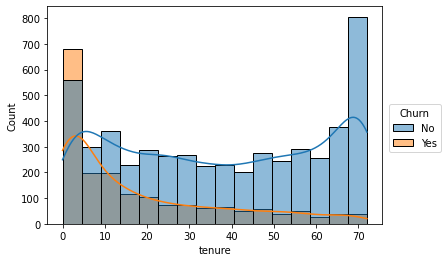

In [103]:
fig = plt.figure()

# membuat histogram dan density plot menggunakan library seaborn.histplot
ax = sns.histplot(data = df, x = 'tenure', kde = True, hue = "Churn")

# mengakses handles dan labels dari legend yang sudah ada dan mengatur ulang posisi legend-nya
ax.legend(handles=ax.legend_.legendHandles, labels=[t.get_text() for t in ax.legend_.texts],
         title=ax.legend_.get_title().get_text(),
         bbox_to_anchor=(1.02, 0.55), borderaxespad=0)

# menampilkan graphic
plt.show()

##### Nomor 1b:

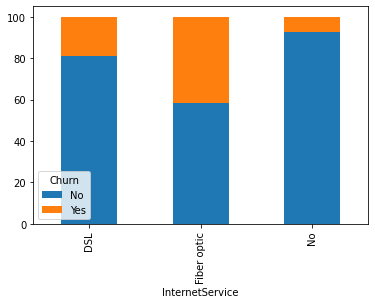

In [90]:
# membuat stacked bar chart dengan bantuan crosstab
ax = pd.crosstab(df['InternetService'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True)

# menampilkan graphic
plt.show()

##### Nomor 1c:
Bagi customer yang Churn, paling banyak mereka menggunakan internet `Fiber optic`.

#### Nomor 2a:

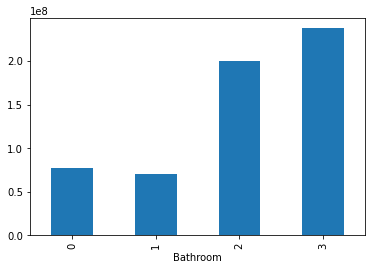

In [101]:
# membuat bar plot menggunakan groupby
df2.groupby(['Bathroom'])['AnnualPrice'].mean().plot(kind = 'bar')

# menampilkan graphic
plt.show()

##### Nomor 2b:
Unit Apartment dengan `Tiga(3)` Kamar Mandi memiliki rata-rata Annual Price paling tinggi. 

##### Nomor 3a:

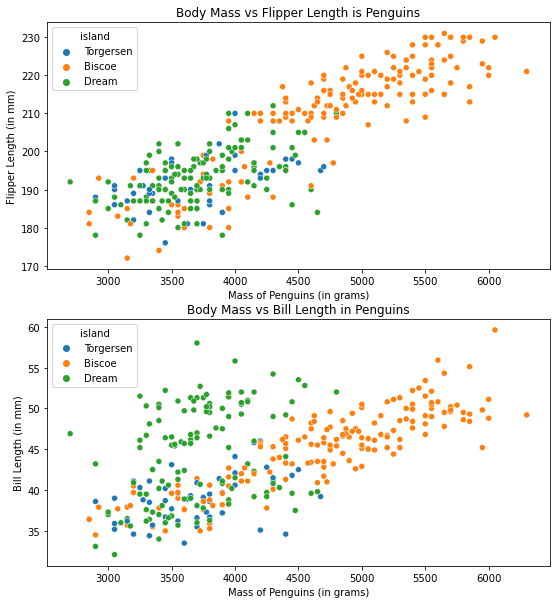

In [94]:
# membuat figure subplot vertikal dan set size figure
fig, (ax1, ax2) = plt.subplots(2, figsize=(9,10))

# Scatterplot Pertama
# membuat sumbu x, y, dan hue
sns.scatterplot(data = df3, ax = ax1, x = 'body_mass_g', y = 'flipper_length_mm', hue = 'island')
ax1.set_title('Body Mass vs Flipper Length is Penguins')
ax1.set_xlabel('Mass of Penguins (in grams)')
ax1.set_ylabel('Flipper Length (in mm)')

# Scatterplot Kedua
# membuat sumbu x, y, dan hue
sns.scatterplot(data = df3, ax = ax2, x = 'body_mass_g', y = 'bill_length_mm', hue = 'island')
ax2.set_title('Body Mass vs Bill Length in Penguins')
ax2.set_xlabel('Mass of Penguins (in grams)')
ax2.set_ylabel('Bill Length (in mm)')

# menampilkan graphic
plt.show()

##### Nomor 3b:
Kolom `body_mass_g` lebih baik digunakan untuk memprediksi `Flipper Length`.